In [1]:
from sklearn import tree
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

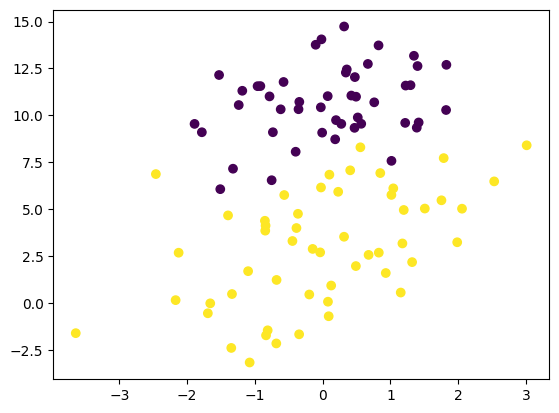

In [2]:
# 载入数据
data = np.genfromtxt("LR-testSet.csv", delimiter=",")
x_data = data[:, : -1]
y_data = data[:, -1]

plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plt.show()

In [3]:
model = tree.DecisionTreeClassifier()

model.fit(x_data, y_data)



DecisionTreeClassifier()

In [ ]:
# 画决策树图
import graphviz

dot_data = tree.export_graphviz(model, out_file = None, feature_names = ['x', 'y'], 
                                class_names = ['label0', 'label1'], filled = True, rounded = True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('dtree-cart')
graph

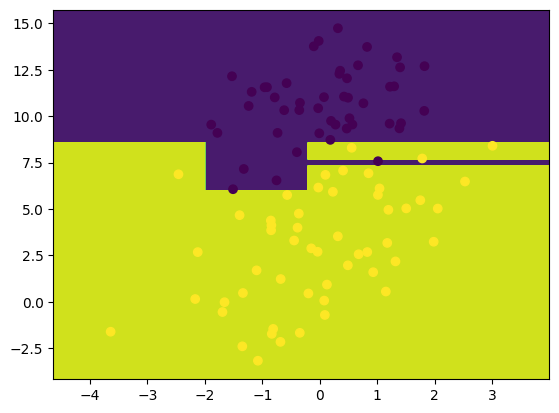

In [4]:
x_min, x_max = x_data[:, 0].min() - 1 , x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1 , x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# np.r_按row行来组合array,一行叠在一行后面，变成一个很长的一行
z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel和flatten类似，多维数据转一维，却会改变原始数据，最后变成[x,y],再进行预测
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z)

plt.scatter(x_data[:, 0], x_data[:, 1], c = y_data)
plt.show()

In [5]:
predictions = model.predict(x_data)
print(classification_report(predictions, y_data))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47
         1.0       1.00      1.00      1.00        53

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

